# Backtester

In [1]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import model as m
import importlib
importlib.reload(m)


<module 'model' from '/Users/SunnyNie/Documents/Investing/metagame/model.py'>

In [99]:
df = m.get_backtesting_df(progress=True, sleep=0.5)

 |██████████████████████████████████████████████████| 100.0% 


In [100]:
df.to_csv("data/backtesting.csv")

In [101]:
import ui

In [102]:
df.idxmax(axis=1)

timestamp
2017-07-14 04:00:00    eth
2017-07-14 05:00:00    eth
2017-07-14 06:00:00    eth
2017-07-14 07:00:00    eth
2017-07-14 08:00:00    eth
                      ... 
2022-01-21 03:00:00    btc
2022-01-21 04:00:00    btc
2022-01-21 05:00:00    btc
2022-01-21 06:00:00    btc
2022-01-21 07:00:00    btc
Length: 41514, dtype: object

In [17]:
for i in range(1, len(df)):
    (df.iloc[i]-df.iloc[i-1])/df.iloc[i-1]
    ui.printProgressBar(i, len(df))

In [103]:
pct = (df - df.shift(1))/df.shift(1)
pct.drop("btc", inplace=True, axis=1)
pct.dropna(how="all", inplace=True)

In [104]:
best = pct.idxmax(axis=1).shift(1)

In [112]:
returns = []
total = len(pct)
for i in range(2, total):
    # if pct.iloc[i-1][best.iloc[i]]<0:
    #     returns.append(0)
    # else:
    returns.append(-pct.iloc[i][best.iloc[i]]-0.002)
    ui.printProgressBar(i, total)
    

<AxesSubplot:>

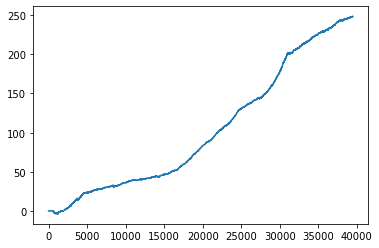

In [113]:
pd.Series(returns).cumsum().plot()

In [110]:
returns[-15:]

[-0.04858385093167703,
 0.011600395647873454,
 -0.002,
 0.030258064516129064,
 0.01621493624772318,
 0.027411764705882323,
 0.06251612903225813,
 0.006107012565869456,
 0.031333333333333366,
 0.04141085271317827,
 -0.015788554557447054,
 0.0009399412011759341,
 0.012724310776942409,
 5.690778196775544e-05,
 0.019276595744680873]